# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once. It will take a couple of minutes. If the page stops working, reload it and run this cell again.

In [ ]:
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/nnaujcnzdp5y8ua/mip_corpus_search.db.zip?dl=1  -O mip_corpus_search.db.zip
!unzip -o mip_corpus_search.db.zip -d /content/
%run search_utils.py

Archive:  mip_corpus_search.db.zip
  inflating: /content/mip_corpus_search.db  
  inflating: /content/__MACOSX/._mip_corpus_search.db  
generate_derived_attributes_muse_df
ok


## Search

Syntax: * means 'any character'

In [95]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "closure" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = True #@param {type:"boolean"}
search_twitter = True #@param {type:"boolean"}
max_results =  50#@param {type:"integer"}
context_window =  10#@param {type:"integer"}
#beg_time = "2021-11-24" #@param {type:"date"}
res_df = run_search(search_string, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

ok
WEBSITES: 679 matches found. N sessions: 2. Unique museums: 367
FACEBOOK: 6413 matches found. Unique museums: 563
TWITTER: 8976 matches found. Unique museums: 714
Duplicates removed (from 16068 to 11138)
search_regex: '(?i)\bclosure\b'


res,museum_id,account,before,match,after,msg_time
3178,mm.wiki.448,countytimes,The,closure,was described as temporary when it was announced last,2021-10-20
2668,mm.musa.252,NationalSpaceCentre,doors in 2020 to protect our visitors and staff.,Closure,of the doors did not stop our goal to,2021-10-18
2494,mm.mgs.321,PortsoySalmonBothy,Please take note of this upcoming road,closure,which takes effect from 1 November for five days.,2021-10-18
3179,mm.wiki.448,countytimes,The trust cited a worsening staff shortage for the,closure,,2021-10-15
2756,mm.mgs.418,MorayCouncil,⛔️ Marywell Footbridge,closure,⛔️ Marywell Footbridge is closed to pedestrians until further,2021-10-15
4268,mm.domus.SW201,Lanhydrock,Update on the Stables tea-rooms,closure,: now also closed on Friday 15 October. Thank you,2021-10-14
4179,mm.domus.SE483,kentpolice,the victim's family and friends with a sense of,closure,after what must have been a very distressing time,2021-10-14
4180,mm.domus.SE483,kentpolice,and are now in a position to apply for,closure,orders in connection to some of the businesses.,2021-10-14
2337,mm.fcm.090,edencamp,📣Temporary,Closure,Notice📣 Due to necessary restoration of our 80year old,2021-10-13
4212,mm.domus.SW237,Killerton,(please see the map showing the closed area). This,closure,will not affect the lower ‘Cubby Close’ track or,2021-10-13


<Figure size 432x288 with 0 Axes>

# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

ok
Search: "closure" • N results: 11138 • N unique museums: 1250


,platform,n_results,museum_id
0,twitter,6004,714
1,facebook,4455,563
2,website_sentences,679,367


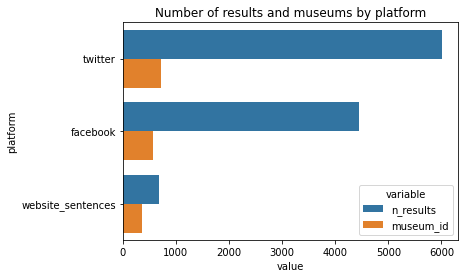

road (1759) museum (804) rt (775) temporary (711) closed (604) us (560) support (491) 
due (433) please (417) today (409) following (401) new (354) open (335) help (316) 
one (315) day (285) update (281) ⚠️ (267) work (264) works (248) 

road (1601) closed (1239) please (1102) museum (810) place (801) due (696) us (675) 
open (661) visit (567) time (559) monday (532) traffic (497) closure (497) work (482) 
access (474) via (460) support (447) new (446) help (412) roundabout (411) 

Unique museum results: 1644


,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
0,Independent:Not for profit,685,41.7,1534,44.7
1,Government:Local Authority,455,27.7,718,63.4
2,Independent:National Trust,144,8.8,183,78.7
3,Independent:Private,113,6.9,472,23.9
4,University,76,4.6,92,82.6
5,Government:National,69,4.2,69,100.0
6,Independent:Unknown,41,2.5,113,36.3
7,Unknown,21,1.3,55,38.2
8,Independent:Historic Environment Scotland,18,1.1,19,94.7
9,Independent:English Heritage,9,0.5,52,17.3


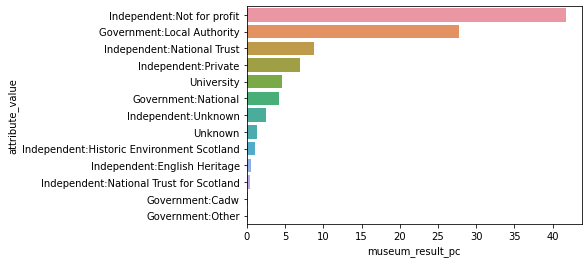

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
13,South East,232,14.1,476,48.7
14,Scotland,186,11.3,494,37.7
15,South West,180,10.9,422,42.7
16,London,170,10.3,238,71.4
17,East of England,163,9.9,333,48.9
18,North West,139,8.5,247,56.3
19,Yorkshire and The Humber,133,8.1,229,58.1
20,West Midlands,119,7.2,228,52.2
21,East Midlands,102,6.2,229,44.5
22,Wales,89,5.4,207,43.0


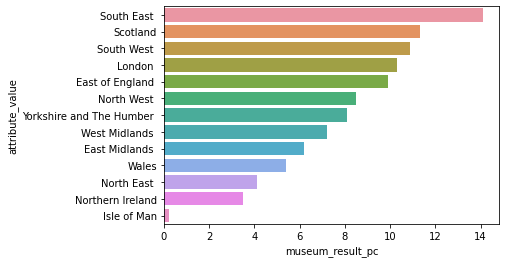

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
26,small,611,37.2,1825,33.5
27,medium,487,29.6,865,56.3
28,large,473,28.8,498,95.0
29,unknown,54,3.3,141,38.3
30,huge,16,1.0,12,133.3


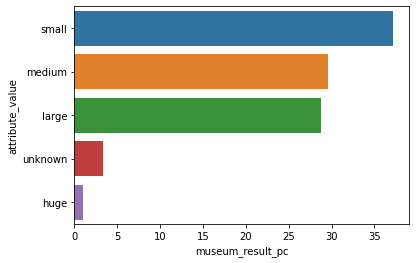

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
31,Local Histories,321,19.5,764,42.0
32,Buildings,270,16.4,553,48.8
33,Arts,174,10.6,247,70.4
34,Mixed,150,9.1,166,90.4
35,Transport,121,7.4,224,54.0
36,War and conflict,122,7.4,333,36.6
37,Industry and manufacture,80,4.9,151,53.0
38,Personality,75,4.6,176,42.6
39,Archaeology,52,3.2,91,57.1
40,Sea and seafaring,48,2.9,102,47.1


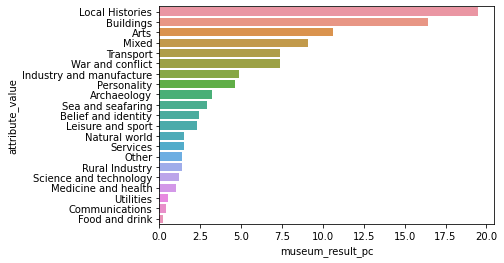

In [99]:
%run search_utils.py
#@title Default title text
token_context_size =  10#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size)
#res_attr_df

### Download results as Excel

In [56]:
# click here to download the complete search results
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [98]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>